In [8]:
import os
from kaggle.api.kaggle_api_extended import KaggleApi
import cv2
from sklearn.utils import shuffle
from loguru import logger
import json
import zipfile
import matplotlib.pyplot as plt

In [ ]:
# Informations d'authentification pour Kaggle
# Mets test tes informations d'authentification ici
#api_token = 
    




In [3]:
# Sauvegarder le fichier kaggle.json dans le répertoire de travail courant
with open('kaggle.json', 'w') as file:
    json.dump(api_token, file)
# Définir le répertoire de configuration de Kaggle
os.environ['KAGGLE_CONFIG_DIR'] = os.getcwd()

# Assurez-vous que les permissions sont correctes
os.chmod('kaggle.json', 0o600)

In [4]:
# Utiliser la bibliothèque Kaggle pour télécharger un fichier
# Exemple : Remplacez 'dataset-owner/dataset-name' par l'identifiant du dataset que vous souhaitez télécharger
!kaggle datasets download -d asdasdasasdas/garbage-classification
# Extraction des fiichiers Zipper
with zipfile.ZipFile('garbage-classification.zip', 'r') as zip_ref:
    zip_ref.extractall('garbage-classification')
files = os.listdir('garbage-classification')
print(files)

Dataset URL: https://www.kaggle.com/datasets/asdasdasasdas/garbage-classification
License(s): copyright-authors




  0%|          | 0.00/82.0M [00:00<?, ?B/s]
 74%|███████▍  | 61.0M/82.0M [00:00<00:00, 635MB/s]
100%|██████████| 82.0M/82.0M [00:00<00:00, 567MB/s]


['Garbage classification', 'one-indexed-files-notrash_test.txt', 'one-indexed-files-notrash_train.txt', 'one-indexed-files-notrash_val.txt', 'one-indexed-files.txt', 'zero-indexed-files.txt']


In [5]:
def read_data(data_path):
    """
    Lit les images et leurs étiquettes depuis un dossier structuré par classes.

    Paramètres :
    - data_path (str) : chemin vers le dossier principal contenant les sous-dossiers de classes.

    Retourne :
    - image_list (list) : liste d'images chargées avec OpenCV.
    - label_list (list) : liste des étiquettes correspondant à chaque image.
    """
    image_list, label_list = [], []

    # Parcourt chaque dossier (chaque classe)
    for class_name in os.listdir(data_path):
        class_path = os.path.join(data_path, class_name)
        
        if os.path.isdir(class_path):  # Vérifie que c'est bien un dossier
            for image_name in os.listdir(class_path):
                image_path = os.path.join(class_path, image_name)
                image = cv2.imread(image_path)  # Lit l'image

                if image is not None:
                    image_list.append(image)
                    label_list.append(class_name)  # Utilise le nom du dossier comme label

    # Mélange les données pour éviter les biais d'ordre
    return shuffle(image_list, label_list, random_state=42)


In [9]:
images, labels = read_data("garbage-classification/Garbage classification/Garbage classification")
print(f"{len(images)} images chargées.")
print(f"Classes détectées : {set(labels)}")



2527 images chargées.
Classes détectées : {'paper', 'metal', 'cardboard', 'glass', 'plastic', 'trash'}


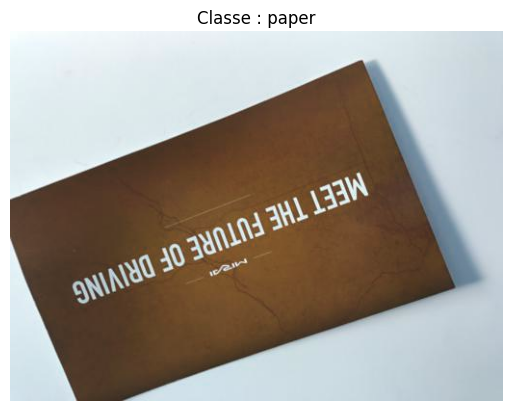

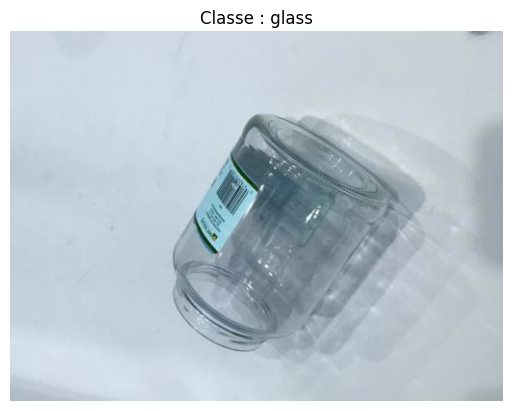

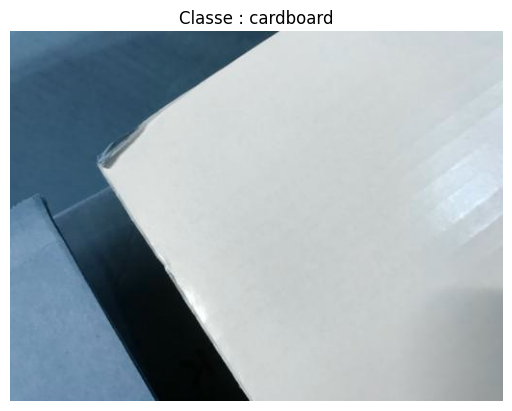

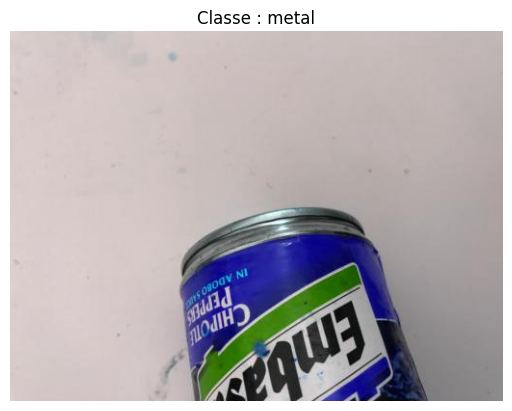

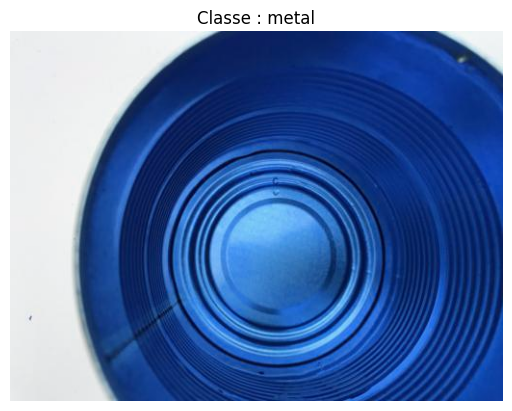

In [7]:
# Vérions si les images sont correctement chargées
for i in range(5):
    plt.imshow(images[i])
    plt.title(f"Classe : {labels[i]}")
    plt.axis("off")
    plt.show()


Nous remarquons que l'importation a bien fonctionné. 